This notebook focuses on the analysis of Trump Presidency Approval and the effect of tweets.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
from bokeh.palettes import Category10
from bokeh.plotting import *
from bokeh.models import *
from bokeh.layouts import gridplot

# Poll & Troll Tweets

## Poll Data

In [4]:
# Data Folder Names
DATA_FOLDER = './Data'
FILE_NAME_PRESIDENCY = '/approval_polllist.csv'

The Dataset contains the following columns: 
* **President** : The sitting president
* **subgroup** : 
* **modeldate** :
* **startdate** : start date of poll
* **enddate** : end date of poll
* **pollster** : organism conducting the poll
* **garde** : 
* **samplesize** : number of sample in the poll
* **population** :  
* **weight** : 
* **influence**:
* **approve** : raw approval rate
* **disapprove** : raw disapproval rate
* **adjusted_approve** : ajusted approval rate
* **adjusted_disapprove** : ajusted disapproval rate
* **multiversion** :
* **tracking**:
* **url** : 
* **poll_id** : id of the poll
* **question_id** : 
* **createdate** : date of poll creation
* **timestamp** : timestamp upon data download

Import the Presidential poll data:

In [7]:
data_poll = pd.read_csv(DATA_FOLDER + FILE_NAME_PRESIDENCY)
data_poll.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,11/2/2018,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.946437,...,37.0,42.97840,39.17828,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,09:40:57 2 Nov 2018
1,Donald Trump,All polls,11/2/2018,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,...,45.0,46.03609,43.29538,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,09:40:57 2 Nov 2018
2,Donald Trump,All polls,11/2/2018,1/20/2017,1/24/2017,Ipsos,B+,1632.0,a,0.224456,...,45.2,42.54131,44.02427,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,09:40:57 2 Nov 2018
3,Donald Trump,All polls,11/2/2018,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,...,46.0,46.03609,44.29538,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,09:40:57 2 Nov 2018
4,Donald Trump,All polls,11/2/2018,1/20/2017,1/25/2017,Quinnipiac University,A-,1190.0,rv,1.644662,...,44.0,37.71539,42.58517,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,09:40:57 2 Nov 2018


In [8]:
data_poll.describe()

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2109.067588,0.415727,0.006265,41.599306,53.958674,40.726823,53.539380,51425.715562,81309.654930
std,3041.332210,0.485570,0.052139,4.013790,3.676408,3.127892,3.150922,1970.963301,3745.711722
min,121.000000,0.015995,0.000000,23.900000,35.000000,25.007210,37.517950,49232.000000,77244.000000
25%,1232.000000,0.147024,0.000000,38.800000,52.000000,38.537590,51.736730,49955.000000,78509.250000
50%,1500.000000,0.164857,0.000000,41.000000,54.000000,40.641320,53.650590,50702.000000,80030.000000
75%,1712.000000,0.474440,0.000000,44.000000,56.300000,42.873030,55.585170,52559.000000,83043.750000
max,55372.000000,2.818629,1.336519,59.000000,75.900000,54.873030,70.197130,56668.000000,91267.000000


At first sight, the dataset seems clean. 
<br>
And we drop some useless columns:

In [10]:
data_poll.drop(columns={'president','subgroup','multiversions','tracking','url','timestamp'}, inplace=True)
data_poll.head(2)

,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id,createddate
0,11/2/2018,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.946437,0.0,46.0,37.0,42.97840,39.17828,49249,77261,1/23/2017
1,11/2/2018,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,0.0,45.0,45.0,46.03609,43.29538,49253,77265,1/23/2017


We cast the `forecastdate`, `startdate`, `enddate`, and `createddate` into datetime object:

In [11]:
data_poll['modeldate'] = pd.to_datetime(data_poll['modeldate'])
data_poll['startdate'] = pd.to_datetime(data_poll['startdate'])
data_poll['enddate'] = pd.to_datetime(data_poll['enddate'])
data_poll['createddate'] = pd.to_datetime(data_poll['createddate'])

We use `createddate` as time reference: <br>
and we group the polls by creation dates using mean on the other columns (especially on the adjusted polls)<br>
Then a rolling mean (window of 7 days) is used to smoothed the line

In [13]:
data_poll_grp = data_poll.groupby(by=['createddate']).mean()
data_poll_avg = data_poll_grp.rolling(window=7, min_periods=1).mean()

We can now plot this average adjusted polls in function of the creation date of the poll. We use Bokeh library to produce interractive plot: 

In [14]:
# Add Plot here !

## Tweet Data

In [15]:
def get_date_time(x):
    """
    From string to datatime.date()
    input: 
        x    : str
    output:
        date : datetime - Only month/day/year
        time : datetime - Only hour/minutes/
    """
    date_time = dt.datetime.strptime(x, '%m/%d/%Y %H:%M')
    date = date_time.replace(minute=0, hour=0, second=0)
    time = date_time.hour
    
    return date


def cleaning_plot(df,dataset):
    """
    Cleans and selecting relevant tweets.
    input:
        df      - pd.DataFrame: Containing one of the IRA datasets
        dataset - int         : The IRA dataset ID
    output:
        df_tmp  - pd.DataFrame: Cleaned IRA dataset
    """
    RELEVANT_COL = ['author', 'publish_date', 'account_category', 'content', 'following', 'followers', 'retweet']
    
    #We will only select tweets in english. This represents 77% of the datasets.
    df_tmp = df[df.language == 'English'].drop(columns={'harvested_date', 'language'})
    df_tmp = df_tmp[RELEVANT_COL]

    #Keeping only right troll and left troll tweets. (57% datasets)
    df_tmp = df_tmp[(df_tmp.account_category == 'RightTroll') | (df_tmp.account_category == 'LeftTroll')  ]

    #date 
    df_tmp['publish_date'] = df_tmp.publish_date.apply(lambda x: get_date_time(x))
    df_tmp = df_tmp[df_tmp.publish_date > dt.datetime(2014,10,1,0,0,0)] #selecting after Oct 2014

    df_tmp['dataset'] = dataset #from which dataset it comes

    return df_tmp

DATA_FOLDER = 'Data/'
TWEET_DATA = 'russian-troll-tweets/IRAhandle_tweets_'
APPROVAL_DATA = 'approval_polllist.csv'
CAMPAIGN_POLLS = 'presidential_polls.csv'

tweet_data = pd.DataFrame()

# The dataset is composed of 9 sub_datasets
for dataset in range(1,9):
    df_tmp = cleaning_plot(pd.read_csv(DATA_FOLDER + TWEET_DATA + str(dataset) + '.csv'), dataset)
    tweet_data = tweet_data.append(df_tmp, ignore_index=True)

We first get the number of right/left troll tweets per days

In [16]:
tweet_data_right = tweet_data[tweet_data['account_category'] == 'RightTroll'] 
tweet_data_left = tweet_data[tweet_data['account_category'] == 'LeftTroll']
tweet_count = pd.DataFrame({'RightTroll count':tweet_data_right.publish_date.value_counts().sort_index(), \
                            'LeftTroll count':tweet_data_left.publish_date.value_counts().sort_index()}).fillna(0)
tweet_count.head()

,RightTroll count,LeftTroll count
2014-10-18,0.0,1.0
2014-11-25,26.0,0.0
2014-11-26,35.0,0.0
2014-11-28,82.0,0.0
2014-12-01,12.0,0.0


We then merge the approvals averages with the troll tweets numbers based on the startdate of the polls and the tweet's dates:

In [17]:
# group by polls start dates 
data_poll_grp = data_poll.groupby(by=['startdate']).mean()
# smoothen the data with a rolling mean over a week 
data_poll_avg = data_poll_grp.rolling(window=7, min_periods=1).mean()
# merge by date data with right and left troll counts
data_tweet_polls = data_poll_avg[['adjusted_approve','adjusted_disapprove']].merge(tweet_count, left_index=True, right_index=True)
data_tweet_polls.head(2)

,adjusted_approve,adjusted_disapprove,RightTroll count,LeftTroll count
2017-01-20,42.644602,42.271389,1387.0,941.0
2017-01-21,43.145552,43.590006,1036.0,964.0


We can now plot : <br>
* approve rate vs right trolls tweet count
* disapprove rate vs left trolls tweet count
* approve rate vs right trolls tweet count
* disapprove rate vs left trolls tweet count

(-100, 2000)

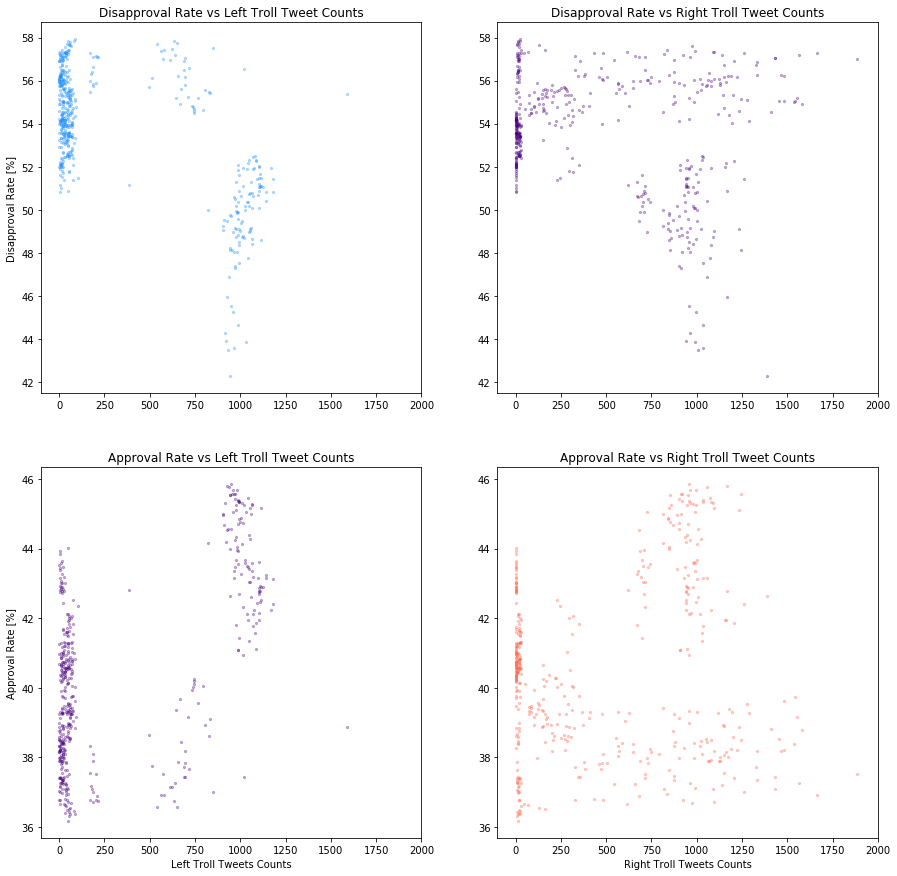

In [19]:
figTweetPolls = plt.figure(figsize=(15,15))

ax1 = figTweetPolls.add_subplot(2,2,1)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='adjusted_disapprove', ax=ax1, color='dodgerblue',marker='.',alpha=0.3, legend=False)
ax1.set_title('Disapproval Rate vs Left Troll Tweet Counts')
ax1.set_xlabel('')#'Left Troll Tweets Counts')
ax1.set_ylabel('Disapproval Rate [%]')
ax1.set_xlim(-100,2000)

ax2 = figTweetPolls.add_subplot(2,2,2)
data_tweet_polls.plot.scatter(x='RightTroll count', y='adjusted_disapprove', ax=ax2, color='indigo',marker='.',alpha=0.3, legend=False)
ax2.set_title('Disapproval Rate vs Right Troll Tweet Counts')
ax2.set_xlabel('')#'Right Troll Tweets Counts')
ax2.set_ylabel('')#'Clinton Polls Rate [%]')
ax2.set_xlim(-100,2000)

ax3 = figTweetPolls.add_subplot(2,2,3)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='adjusted_approve', ax=ax3, color='indigo',marker='.',alpha=0.3, legend=False)
ax3.set_title('Approval Rate vs Left Troll Tweet Counts')
ax3.set_xlabel('Left Troll Tweets Counts')
ax3.set_ylabel('Approval Rate [%]')
ax3.set_xlim(-100,2000)

ax4 = figTweetPolls.add_subplot(2,2,4)
data_tweet_polls.plot.scatter(x='RightTroll count', y='adjusted_approve', ax=ax4, color='tomato',marker='.',alpha=0.3, legend=False)
ax4.set_title('Approval Rate vs Right Troll Tweet Counts')
ax4.set_xlabel('Right Troll Tweets Counts')
ax4.set_ylabel('')#'Trump Polls Rate [%]')
ax4.set_xlim(-100,2000)


In [21]:
data_tweet_polls.corr('spearman')

,adjusted_approve,adjusted_disapprove,RightTroll count,LeftTroll count
adjusted_approve,1.000000,-0.985029,-0.115261,0.427039
adjusted_disapprove,-0.985029,1.000000,0.057874,-0.445731
RightTroll count,-0.115261,0.057874,1.000000,0.389265
LeftTroll count,0.427039,-0.445731,0.389265,1.000000


As visible in the above plot and the corresponding pearson coefficient, there are no clear correlation between number of troll tweets and the polls rate. <br>
However we cannot expect the troll tweet to change the polls drastically up to the percent changes. There are many more factors playing in the poll than just the troll tweets. In consequences, we will look at the polls variation over time and look whether it correltate with troll activity on twitter. To do so we compute the derivative of the polls rate with respect to time:  

In [25]:
#get the derivative with respect to time for the Clinton and Trump Polls 
data_tweet_polls[['ddisapprove', 'dapprove']] = data_tweet_polls[['adjusted_disapprove','adjusted_approve']].diff()
data_tweet_polls['time_diff'] = data_tweet_polls.index.to_series().diff().dt.days
data_tweet_polls['ddisapprove/dt'] = data_tweet_polls['ddisapprove']/data_tweet_polls['time_diff']
data_tweet_polls['dapprove/dt'] = data_tweet_polls['dapprove']/data_tweet_polls['time_diff']
data_tweet_polls.head(2)

,adjusted_approve,adjusted_disapprove,RightTroll count,LeftTroll count,ddisapprove,dapprove,time_diff,ddisapprove/dt,dapprove/dt
2017-01-20,42.644602,42.271389,1387.0,941.0,NaN,NaN,NaN,NaN,NaN
2017-01-21,43.145552,43.590006,1036.0,964.0,1.318618,0.50095,1.0,1.318618,0.50095


We can now visualize how the polls variation changes with the troll tweets counts : 

(-100, 2000)

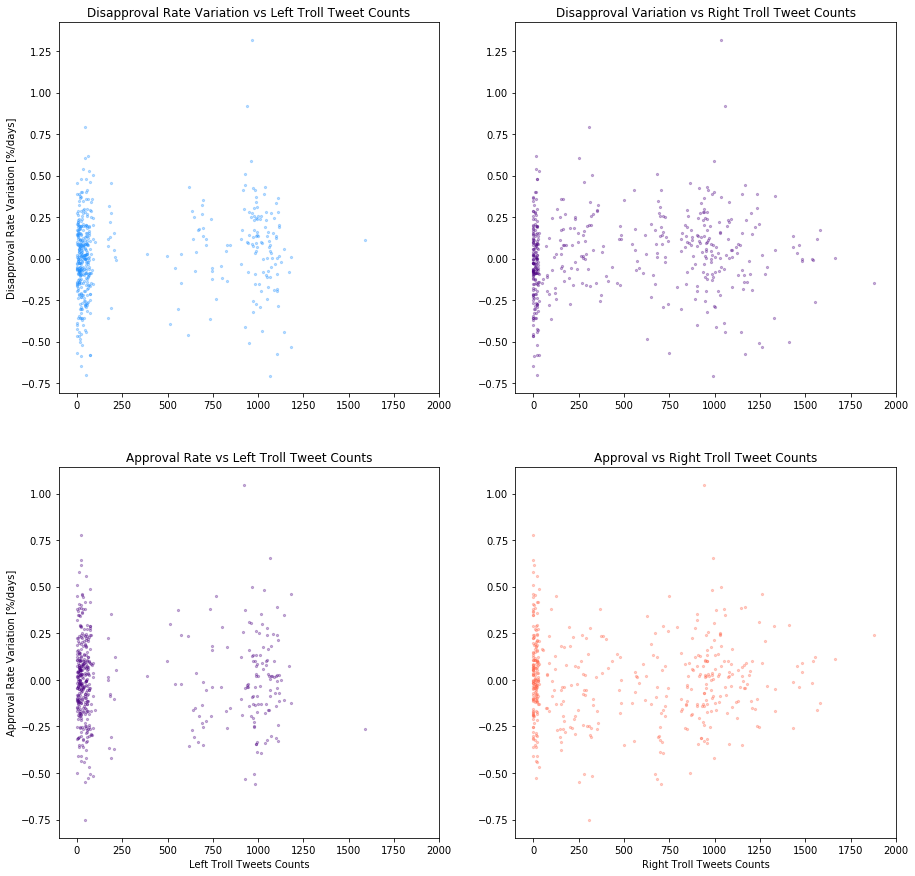

In [26]:
figTweetVarPolls = plt.figure(figsize=(15,15))

ax1 = figTweetVarPolls.add_subplot(2,2,1)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='ddisapprove/dt', ax=ax1, color='dodgerblue',marker='.',alpha=0.3, legend=False)
ax1.set_title('Disapproval Rate Variation vs Left Troll Tweet Counts')
ax1.set_xlabel('')#'Left Troll Tweets Counts')
ax1.set_ylabel('Disapproval Rate Variation [%/days]')
ax1.set_xlim(-100,2000)

ax2 = figTweetVarPolls.add_subplot(2,2,2)
data_tweet_polls.plot.scatter(x='RightTroll count', y='ddisapprove/dt', ax=ax2, color='indigo',marker='.',alpha=0.3, legend=False)
ax2.set_title('Disapproval Variation vs Right Troll Tweet Counts')
ax2.set_xlabel('')#'Right Troll Tweets Counts')
ax2.set_ylabel('')#'Clinton Polls Rate [%]')
ax2.set_xlim(-100,2000)

ax3 = figTweetVarPolls.add_subplot(2,2,3)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='dapprove/dt', ax=ax3, color='indigo',marker='.',alpha=0.3, legend=False)
ax3.set_title('Approval Rate vs Left Troll Tweet Counts')
ax3.set_xlabel('Left Troll Tweets Counts')
ax3.set_ylabel('Approval Rate Variation [%/days]')
ax3.set_xlim(-100,2000)

ax4 = figTweetVarPolls.add_subplot(2,2,4)
data_tweet_polls.plot.scatter(x='RightTroll count', y='dapprove/dt', ax=ax4, color='tomato',marker='.',alpha=0.3, legend=False)
ax4.set_title('Approval vs Right Troll Tweet Counts')
ax4.set_xlabel('Right Troll Tweets Counts')
ax4.set_ylabel('')#'Trump Polls Rate [%]')
ax4.set_xlim(-100,2000)

Here is another way of looking (qualitatively) at it : 

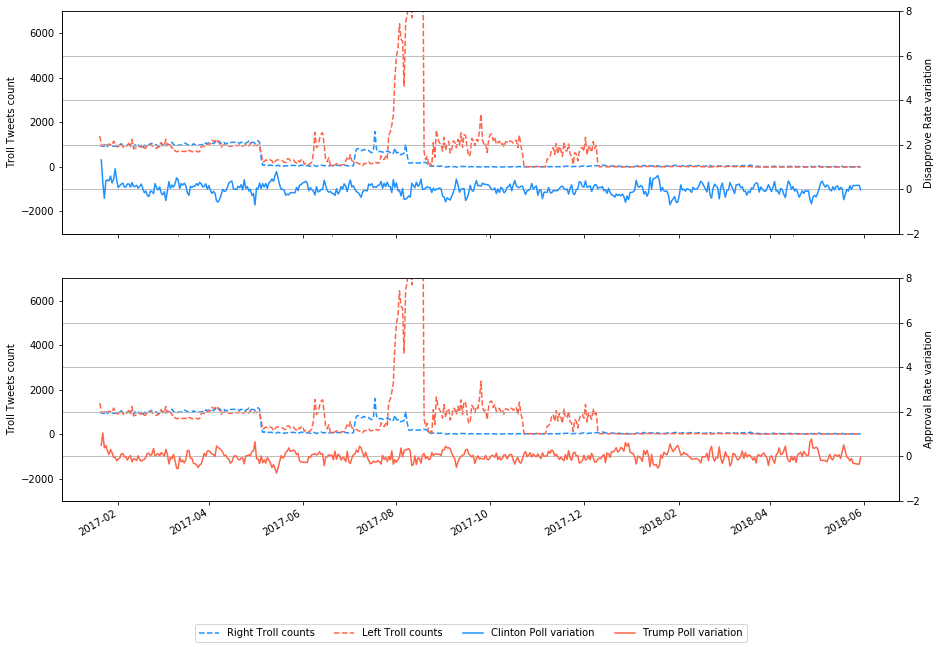

In [27]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1_2 = ax1.twinx()
data_tweet_polls.loc[:,['LeftTroll count','RightTroll count']].plot(ax=ax1, color=['dodgerblue','tomato'], linestyle='--')
data_tweet_polls.loc[:,['ddisapprove/dt']].plot(ax=ax1_2, color='dodgerblue')
ax1_2.set_ylim(-2,8)
ax1.set_ylim(-3000,7000)
ax1_2.grid(True)
ax1.set_ylabel('Troll Tweets count')
ax1_2.set_ylabel('Disapprove Rate variation')

ax2 = fig.add_subplot(212)
ax2_2 = ax2.twinx()
data_tweet_polls.loc[:,['LeftTroll count','RightTroll count']].plot(ax=ax2, color=['dodgerblue','tomato'], linestyle='--')
data_tweet_polls.loc[:,['dapprove/dt']].plot(ax=ax2_2, color='tomato')
ax2_2.set_ylim(-2,8)
ax2.set_ylim(-3000,7000)
ax2_2.grid(True)
ax2.set_ylabel('Troll Tweets count')
ax2_2.set_ylabel('Approval Rate variation')

ax1.legend().remove()
ax1_2.legend().remove()
ax2.legend().remove()
ax2_2.legend().remove()

fig.legend((ax1.get_lines()[0],ax1.get_lines()[1],ax1_2.get_lines()[0],ax2_2.get_lines()[0]),('Right Troll counts','Left Troll counts','Clinton Poll variation','Trump Poll variation'), loc = 'lower center', ncol=4 )

In [28]:
data_tweet_polls[['RightTroll count','LeftTroll count','ddisapprove/dt','dapprove/dt']].corr(method='spearman')

,RightTroll count,LeftTroll count,ddisapprove/dt,dapprove/dt
RightTroll count,1.000000,0.389265,0.131656,-0.045466
LeftTroll count,0.389265,1.000000,0.128798,-0.051435
ddisapprove/dt,0.131656,0.128798,1.000000,-0.769303
dapprove/dt,-0.045466,-0.051435,-0.769303,1.000000


Even here, it does not seems that the number of troll tweets correlate with the polls variations. We should look for other variables that may correlate with the polls: we'll start by looking at the number of person directly touched by the tweets (*i.e.* the number of followers). 

We get how many people (the maximum people) are reached everyday by right and left trolls respectively:

In [29]:
people=tweet_data[['publish_date', 'account_category','followers', 'author']]\
            .groupby(by=['publish_date', 'account_category', 'author']).max()\
            .unstack('account_category').fillna(0)\
            .groupby('publish_date').sum()
people.followers.head()

account_category,LeftTroll,RightTroll
publish_date,,
2014-10-18,6.0,0.0
2014-11-25,0.0,84.0
2014-11-26,0.0,84.0
2014-11-28,0.0,84.0
2014-12-01,0.0,98.0


In [30]:
p3 = figure(plot_width=850, plot_height=450, x_axis_type='datetime')
p3.title.text = 'Maximal People directly reached by the tweets'
p3.yaxis.axis_label = 'Tweet density'

source = ColumnDataSource(data=people.followers)
right=p3.line(x='publish_date', y='LeftTroll', line_width=2, alpha=1, legend='Left', color='dodgerblue', source=source)

source = ColumnDataSource(data=people.followers)
left=p3.line(x='publish_date', y='RightTroll', line_width=2, alpha=1, legend='Right', color='tomato', source=source)
p3.legend.location = 'top_left'
p3.legend.click_policy='hide'

hover_tool_R=tools.HoverTool(
    tooltips=[
        ('Date', '@publish_date{%F}'),
        ('People reached','@RightTroll')],
    formatters={
        'publish_date' : 'datetime', # use 'datetime' formatter for 'date' field
        'RightTroll' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    mode='vline',
    renderers=[right],
    attachment='above'
)

hover_tool_L=tools.HoverTool(
    tooltips=[
        ('Date', '@publish_date{%F}'),
        ('People reached','@LeftTroll')],
    formatters={
        'publish_date' : 'datetime', # use 'datetime' formatter for 'date' field
        'LeftTrollTroll' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    mode='vline',
    renderers=[left],
    attachment='above'
)

p3.tools.append(hover_tool_R)
p3.tools.append(hover_tool_L)

p4 = figure(plot_width=850, plot_height=450, x_axis_type='datetime')
p4.title.text = 'Tweeting activity according to Right and Left category'
p4.yaxis.axis_label = 'Tweet density'

categories=tweet_data.account_category.unique()
colorplot = ['tomato','dodgerblue']

for color, category in enumerate(categories):
    df_plot = pd.DataFrame(tweet_data[tweet_data.account_category==category].publish_date.value_counts().sort_index())
    source = ColumnDataSource(data=df_plot)
    p4.line(x='index', y='publish_date', source=source,\
            line_width=2, alpha=0.8, legend=category, color=colorplot[color])

p4.legend.location = 'top_left'
p4.legend.click_policy='hide'

hover_tool=tools.HoverTool(
    tooltips=[
        ('Date', '@index{%b %d, %Y}'),
        ('Number of tweets','@publish_date')],

    formatters={
        'index' : 'datetime', # use 'datetime' formatter for 'date' field
        'publish_date' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)

p4.tools.append(hover_tool)

output_notebook()
follower_plot = gridplot([[p3],[p4]])

Loading BokehJS ...

In [31]:
show(follower_plot)

In [32]:
data_follower_polls = data_poll_avg[['adjusted_disapprove','adjusted_approve']].merge(people.followers, left_index=True, right_index=True)
data_follower_polls.head(2)

,adjusted_disapprove,adjusted_approve,LeftTroll,RightTroll
2017-01-20,42.271389,42.644602,167628.0,371765.0
2017-01-21,43.590006,43.145552,149770.0,308236.0


Text(0,0.5,'')

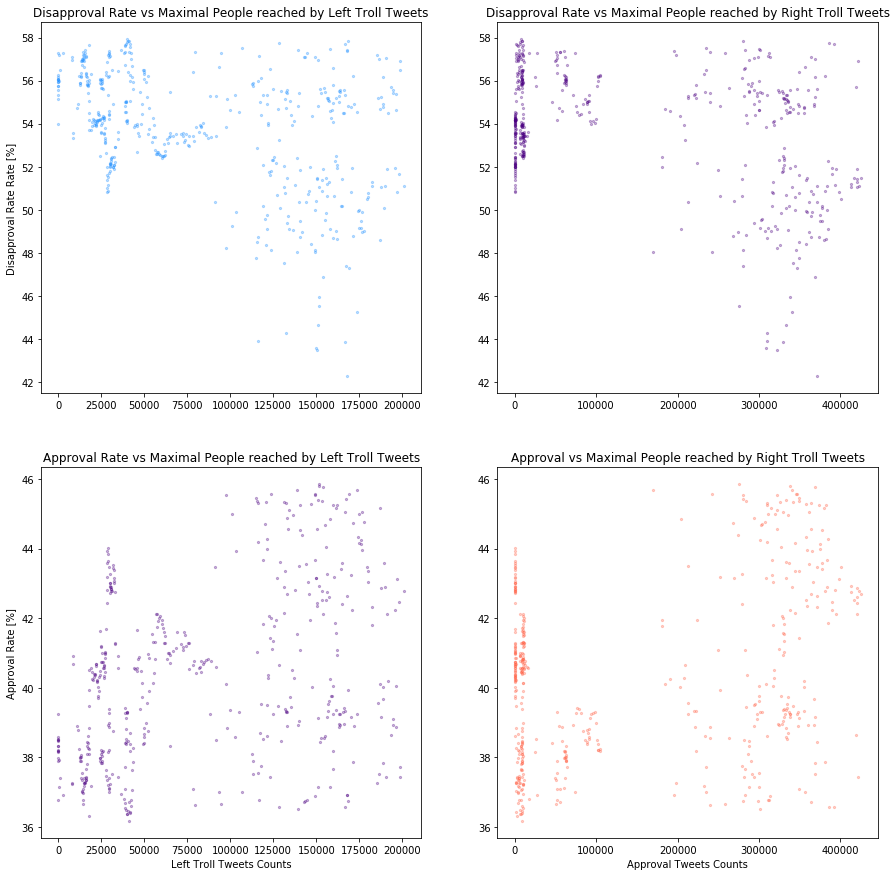

In [33]:
figFollowerPolls = plt.figure(figsize=(15,15))

ax1 = figFollowerPolls.add_subplot(2,2,1)
data_follower_polls.plot.scatter(x='LeftTroll', y='adjusted_disapprove', ax=ax1, color='dodgerblue',marker='.',alpha=0.3, legend=False)
ax1.set_title('Disapproval Rate vs Maximal People reached by Left Troll Tweets')
ax1.set_xlabel('')#'Left Troll Tweets Counts')
ax1.set_ylabel('Disapproval Rate Rate [%]')
#ax1.set_xlim(-100,2000)

ax2 = figFollowerPolls.add_subplot(2,2,2)
data_follower_polls.plot.scatter(x='RightTroll', y='adjusted_disapprove', ax=ax2, color='indigo',marker='.',alpha=0.3, legend=False)
ax2.set_title('Disapproval Rate vs Maximal People reached by Right Troll Tweets')
ax2.set_xlabel('')#'Right Troll Tweets Counts')
ax2.set_ylabel('')#'Clinton Polls Rate [%]')
#ax2.set_xlim(-100,2000)

ax3 = figFollowerPolls.add_subplot(2,2,3)
data_follower_polls.plot.scatter(x='LeftTroll', y='adjusted_approve', ax=ax3, color='indigo',marker='.',alpha=0.3, legend=False)
ax3.set_title('Approval Rate vs Maximal People reached by Left Troll Tweets')
ax3.set_xlabel('Left Troll Tweets Counts')
ax3.set_ylabel('Approval Rate [%]')
#ax3.set_xlim(-100,2000)

ax4 = figFollowerPolls.add_subplot(2,2,4)
data_follower_polls.plot.scatter(x='RightTroll', y='adjusted_approve', ax=ax4, color='tomato',marker='.',alpha=0.3, legend=False)
ax4.set_title('Approval vs Maximal People reached by Right Troll Tweets')
ax4.set_xlabel('Approval Tweets Counts')
ax4.set_ylabel('')#'Trump Polls Rate [%]')
#ax4.set_xlim(-100,2000)

In [34]:
data_follower_polls.corr(method='spearman')

,adjusted_disapprove,adjusted_approve,LeftTroll,RightTroll
adjusted_disapprove,1.000000,-0.985029,-0.387015,-0.240744
adjusted_approve,-0.985029,1.000000,0.380687,0.196713
LeftTroll,-0.387015,0.380687,1.000000,0.768046
RightTroll,-0.240744,0.196713,0.768046,1.000000


In [35]:
data_follower_dpolls = data_follower_polls.merge(data_tweet_polls[['ddisapprove/dt','dapprove/dt']], right_index=True, left_index=True)
data_follower_dpolls.head()

,adjusted_disapprove,adjusted_approve,LeftTroll,RightTroll,ddisapprove/dt,dapprove/dt
2017-01-20,42.271389,42.644602,167628.0,371765.0,NaN,NaN
2017-01-21,43.590006,43.145552,149770.0,308236.0,1.318618,0.500950
2017-01-22,43.888456,44.193660,116343.0,309386.0,0.298449,1.048107
2017-01-23,43.478335,44.570419,150331.0,321876.0,-0.410120,0.376760
2017-01-24,43.865453,45.051454,166711.0,329753.0,0.387118,0.481034


Text(0,0.5,'')

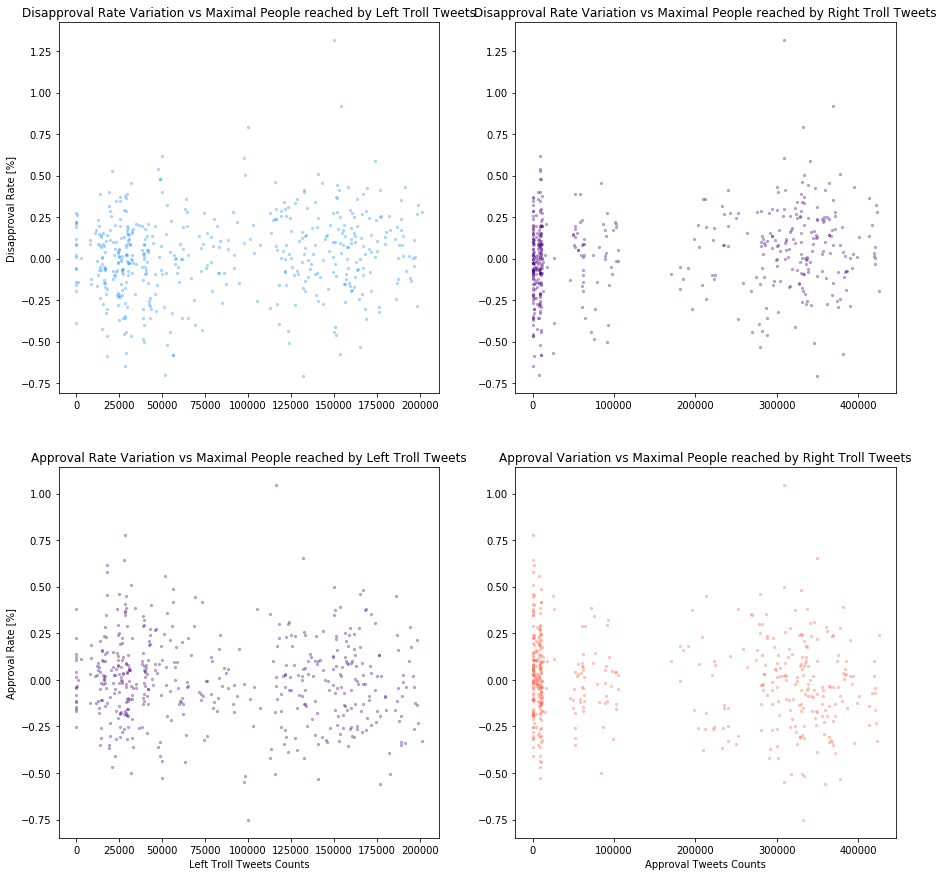

In [36]:
figFollower_dPolls = plt.figure(figsize=(15,15))

ax1 = figFollower_dPolls.add_subplot(2,2,1)
data_follower_dpolls.plot.scatter(x='LeftTroll', y='ddisapprove/dt', ax=ax1, color='dodgerblue',marker='.',alpha=0.3, legend=False)
ax1.set_title('Disapproval Rate Variation vs Maximal People reached by Left Troll Tweets')
ax1.set_xlabel('')#'Left Troll Tweets Counts')
ax1.set_ylabel('Disapproval Rate [%]')
#ax1.set_xlim(-100,2000)

ax2 = figFollower_dPolls.add_subplot(2,2,2)
data_follower_dpolls.plot.scatter(x='RightTroll', y='ddisapprove/dt', ax=ax2, color='indigo',marker='.',alpha=0.3, legend=False)
ax2.set_title('Disapproval Rate Variation vs Maximal People reached by Right Troll Tweets')
ax2.set_xlabel('')#'Right Troll Tweets Counts')
ax2.set_ylabel('')#'Clinton Polls Rate [%]')
#ax2.set_xlim(-100,2000)

ax3 = figFollower_dPolls.add_subplot(2,2,3)
data_follower_dpolls.plot.scatter(x='LeftTroll', y='dapprove/dt', ax=ax3, color='indigo',marker='.',alpha=0.3, legend=False)
ax3.set_title('Approval Rate Variation vs Maximal People reached by Left Troll Tweets')
ax3.set_xlabel('Left Troll Tweets Counts')
ax3.set_ylabel('Approval Rate [%]')
#ax3.set_xlim(-100,2000)

ax4 = figFollower_dPolls.add_subplot(2,2,4)
data_follower_dpolls.plot.scatter(x='RightTroll', y='dapprove/dt', ax=ax4, color='tomato',marker='.',alpha=0.3, legend=False)
ax4.set_title('Approval Variation vs Maximal People reached by Right Troll Tweets')
ax4.set_xlabel('Approval Tweets Counts')
ax4.set_ylabel('')#'Trump Polls Rate [%]')
#ax4.set_xlim(-100,2000)

In [37]:
data_follower_dpolls.corr(method='spearman')

,adjusted_disapprove,adjusted_approve,LeftTroll,RightTroll,ddisapprove/dt,dapprove/dt
adjusted_disapprove,1.000000,-0.985029,-0.387015,-0.240744,-0.088255,-0.009704
adjusted_approve,-0.985029,1.000000,0.380687,0.196713,0.085275,0.015201
LeftTroll,-0.387015,0.380687,1.000000,0.768046,0.125892,-0.082131
RightTroll,-0.240744,0.196713,0.768046,1.000000,0.192738,-0.139781
ddisapprove/dt,-0.088255,0.085275,0.125892,0.192738,1.000000,-0.769303
dapprove/dt,-0.009704,0.015201,-0.082131,-0.139781,-0.769303,1.000000
